# Deep learning for computer vision
- Understanding convolutional neural networks
(convnets)
- Using data augmentation to mitigate overfitting
- Using a pretrained convnet to do feature
extraction
- Fine-tuning a pretrained convnet
- Visualizing what convnets learn and how they
make classification decisions

## 5.1 Introduction to convnets

### <div style='color:#fff; background-color: skyblue;padding:10px 20px;'>Listing 5.1 Instantiating am small convnet</div>

In [1]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Importantly, a convnet takes as input tensors of shape (image_height, image_width,
image_channels) (not including the batch dimension).
<br><br>
 Let’s display the architecture of the convnet so far:

In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
### <div style='color:#fff; background-color: skyblue;padding:10px 20px;'></div>

### <div style='color:#fff; background-color: skyblue;padding:10px 20px;'>Listing 5.2 Adding a classifier on top of the convnet
</div>

In [3]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

We’ll do 10-way classification, using a final layer with 10 outputs and a softmax activation.
Here’s what the network looks like now:

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

As you can see, the (3, 3, 64) outputs are flattened into vectors of shape (576,)
before going through two Dense layers.
 Now, let’s train the convnet on the MNIST digits. We’ll reuse a lot of the code from
the MNIST example in chapter 2.

### <div style='color:#fff; background-color: skyblue;padding:10px 20px;'>Listing 5.3 Training the convnet on MNIST images</div>

In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 56s 934us/step - loss: 0.1756 - acc: 0.9451
Epoch 2/5
60000/60000 [==============================] - 52s 870us/step - loss: 0.0476 - acc: 0.9857
Epoch 3/5
60000/60000 [==============================] - 53s 883us/step - loss: 0.0335 - acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 55s 913us/step - loss: 0.0247 - acc: 0.9922
Epoch 5/5
60000/60000 [==============================] - 54s 899us/step - loss: 0.0200 - acc: 0.9940


Let’s evaluate the model on the test data:

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

10000/10000 [==============================] - 3s 293us/step


0.9908

## 5.1.1 The convolution operation

In [11]:
x = 4
y = 1
print( x % y)

0


In [13]:
y = "this sentence has no meaning"
y.capitalize()

'This sentence has no meaning'

In [14]:
a = [7.72, 0.35, 8.3]
b = ['n', 'k', 'p']
c = [5, 7, 2]
print([c,a,b])


[[5, 7, 2], [7.72, 0.35, 8.3], ['n', 'k', 'p']]


In [20]:
x = ["Apr", "Jan", "May", "Feb", "Mar", "Jun"]
print(x[0:4].__len__())

4


In [21]:
print("\x48\x49!")

HI!


In [22]:
counter =1
def count():
    global counter
    t=(1,2,3)
    for i, v in enumerate(t):
        counter += i+v
count()
print(counter)

10


In [23]:
def f(x, l=[]):
    for i in range(x):
        l.append(i*i)
    return l
f(2)
f(3,[3,2,1])
print(f(3))

[0, 1, 0, 1, 4]


In [25]:
x, y = 15, 45
res = x if x< y else y
print(res)

15


In [27]:
def addItem(l):
    l += [0]
mylist =[1,2,3,4,5]
addItem(mylist)
print(mylist)

[1, 2, 3, 4, 5, 0]


In [28]:
class Book:
    def __init__(self, isbn):
        self.isbn = isbn
        isbn = 'test'
book =Book(12345)
book.isbn

12345

In [29]:
class parent:
    def __init__(self, param):
        self.v1 = param
class child(parents):
    def __init__(self, param):
        self.v2 = param
obj = child(5)
print(obj.v1, obj.v2)

NameError: name 'parents' is not defined

In [30]:
def foo(x=[]):
    x.append(1)
    print(x)
foo()
foo()
foo()

[1]
[1, 1]
[1, 1, 1]


In [31]:
test = 1/2
test

0.5

In [33]:
nums = list()
i=3
while(i<9):
    nums.append(i)
    i = i+2
print(i)

9


In [34]:
x = 10
def foo():
    print(x)
    x = x-1
foo()
print(x)

UnboundLocalError: local variable 'x' referenced before assignment

In [35]:
var1 = lambda var: var * 2
ret = lambda var: var *2
result =3
result = var1(result)
result = ret(result)
result = var1(result)
result

24

In [36]:
squares = []
for x in range(5):
    squares.append(lambda: x **2)
x = 8
for i in range(5):
    print(squares[i]())

64
64
64
64
64


In [37]:
class A:
    def __init__(self, i=0):
        self.i = i
class B(A):
    def __init__(self, j=0):
        self.j = j
def main():
    b =B()
    print(b.i)
    print(b.j)
main()

AttributeError: 'B' object has no attribute 'i'

In [38]:
def val1(param):
    return param
def val2(param):
    return param * 2
def val3(param):
    return param + 5
result = val1(val2(val3(1)))
result

12

In [45]:
import numpy as np

a

array([0, 1, 2])

In [48]:
b = np.arange(4,7)
b

array([4, 5, 6])

In [49]:
np.column_stack((a,b))

array([[0, 4],
       [1, 5],
       [2, 6]])

In [50]:
x = np.arange(16).reshape(4,4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [52]:
y = np.arange(17,33).reshape(4,4)
y

array([[17, 18, 19, 20],
       [21, 22, 23, 24],
       [25, 26, 27, 28],
       [29, 30, 31, 32]])

In [54]:
np.hstack((x,y))

array([[ 0,  1,  2,  3, 17, 18, 19, 20],
       [ 4,  5,  6,  7, 21, 22, 23, 24],
       [ 8,  9, 10, 11, 25, 26, 27, 28],
       [12, 13, 14, 15, 29, 30, 31, 32]])

In [55]:
np.column_stack((x,y))

array([[ 0,  1,  2,  3, 17, 18, 19, 20],
       [ 4,  5,  6,  7, 21, 22, 23, 24],
       [ 8,  9, 10, 11, 25, 26, 27, 28],
       [12, 13, 14, 15, 29, 30, 31, 32]])

HSTACK
 [1 2 3 2 3 4]
COLUMN
 [[1 2]
 [2 3]
 [3 4]]


array([[0, 4],
       [1, 5],
       [2, 6]])

In [57]:

a = np.array([[1],[2],[3]])
b = np.array([[2],[3],[4]])
np.hstack((a,b))


array([[1, 2],
       [2, 3],
       [3, 4]])

In [59]:
a = np.arange(3)
b = np.arange(4,7)
np.column_stack((a,b))

array([[0, 4],
       [1, 5],
       [2, 6]])

In [66]:
def abc(abc=[]):
    abc.append(5)
    
    print(abc)
abc(abc=[1,3,4])

[1, 3, 4, 5]


Graph X readings: range(0, 21)
Graph Y readings: [0.5, 0.7310585786300049, 0.8807970779778823, 0.9525741268224334, 0.9820137900379085, 0.9933071490757153, 0.9975273768433653, 0.9990889488055994, 0.9996646498695336, 0.9998766054240137, 0.9999546021312976, 0.999983298578152, 0.9999938558253978, 0.999997739675702, 0.9999991684719722, 0.999999694097773, 0.9999998874648379, 0.9999999586006244, 0.9999999847700205, 0.9999999943972036, 0.9999999979388463]


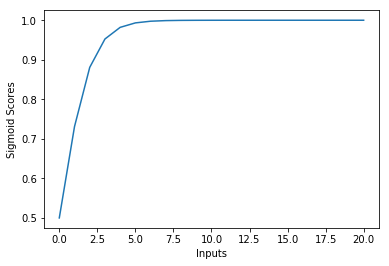

In [69]:
import numpy as np
import matplotlib.pyplot as plt
 
 
def sigmoid(inputs):
    """
    Calculate the sigmoid for the give inputs (array)
    :param inputs:
    :return:
    """
    sigmoid_scores = [1 / float(1 + np.exp(- x)) for x in inputs]
    return sigmoid_scores
 
 
def line_graph(x, y, x_title, y_title):
    """
    Draw line graph with x and y values
    :param x:
    :param y:
    :param x_title:
    :param y_title:
    :return:
    """
    plt.plot(x, y)
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.show()
 
 
graph_x = range(0, 21)
graph_y = sigmoid(graph_x)
 
print ("Graph X readings: {}".format(graph_x))
print ("Graph Y readings: {}".format(graph_y))
 
line_graph(graph_x, graph_y, "Inputs", "Sigmoid Scores")

In [74]:
import numpy as np
 
 
def softmax(inputs):
    """
    Calculate the softmax for the give inputs (array)
    :param inputs:
    :return:
    """
    return np.exp(inputs) / float(sum(np.exp(inputs)))
 
 
softmax_inputs = [2, 3, 5, 6]
print ("Softmax Function Output :: {}".format(softmax(softmax_inputs)))
print(np.sum(softmax(softmax_inputs)))

Softmax Function Output :: [0.01275478 0.03467109 0.25618664 0.69638749]
1.0


In [75]:
scores = np.array([3.0, 1.0, 0.2])
print(softmax(scores *10))

[9.99999998e-01 2.06115362e-09 6.91440009e-13]


In [76]:
scores = np.array([3.0, 1.0, 0.2])
print(softmax(scores /10))

[0.38842275 0.31801365 0.2935636 ]


In [80]:
print(10**9+(-10**6)-10**9)

-1000000


In [85]:
a=10**9
b=0.000001
r = 10**9
for i in range(10**6):
    r+=b
r-a

0.95367431640625